<a href="https://colab.research.google.com/github/JanviDharwal/UCS420/blob/main/LabAssignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
'''
Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
 Well-documented code and clear comments.
 Markdown explanaƟons for each step.
 Screenshots of the plots and outputs.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
roll_number = 102317287
np.random.seed(roll_number)


num_records = 1000

data = {
    "Order_ID": np.arange(1, num_records + 1),
    "Date": pd.date_range(start="2023-01-01", periods=num_records, freq="D"),
    "Product_Category": np.random.choice(["Electronics", "Clothing", "Home", "Beauty", "Toys"], num_records),
    "Price": np.random.randint(100, 5000, num_records),
    "Quantity": np.random.randint(1, 10, num_records),
    "Customer_Age": np.random.randint(18, 65, num_records),
    "Customer_Gender": np.random.choice(["Male", "Female"], num_records),
    "Payment_Method": np.random.choice(["Credit Card", "Debit Card", "PayPal", "Cash on Delivery"], num_records),
    "City": np.random.choice(["New York", "Los Angeles", "Chicago", "Houston", "San Francisco"], num_records),
}

df = pd.DataFrame(data)
df["Total_Sales"] = df["Price"] * df["Quantity"]
df.head()
print(df.describe())
print(df["Product_Category"].value_counts())
print(df.groupby("Product_Category")["Total_Sales"].mean())


          Order_ID                 Date        Price     Quantity  \
count  1000.000000                 1000  1000.000000  1000.000000   
mean    500.500000  2024-05-14 12:00:00  2524.249000     4.870000   
min       1.000000  2023-01-01 00:00:00   101.000000     1.000000   
25%     250.750000  2023-09-07 18:00:00  1255.500000     3.000000   
50%     500.500000  2024-05-14 12:00:00  2570.500000     5.000000   
75%     750.250000  2025-01-19 06:00:00  3717.000000     7.000000   
max    1000.000000  2025-09-26 00:00:00  4992.000000     9.000000   
std     288.819436                  NaN  1409.415574     2.560401   

       Customer_Age   Total_Sales  
count   1000.000000   1000.000000  
mean      40.625000  12235.096000  
min       18.000000    105.000000  
25%       29.000000   4174.500000  
50%       41.000000   9342.000000  
75%       52.000000  18464.250000  
max       64.000000  44406.000000  
std       13.744427  10028.622952  
Product_Category
Clothing       225
Toys           201

In [14]:
#part1
'''
Part I: Randomized Sales Data GeneraƟon (NumPy)
1. IniƟalize Random Seed
2. Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
 The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to
'''
roll_number = 12345
np.random.seed(roll_number)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales_data = np.random.randint(1000, 5000, size=(12, 4))
df_sales = pd.DataFrame(sales_data, columns=["Electronics", "Clothing", "Home & Kitchen", "Sports"], index=months)

print(df_sales)


     Electronics  Clothing  Home & Kitchen  Sports
Jan         1482      4557            4357    3177
Feb         4492      4497            1382    4429
Mar         1546      4613            3817    4190
Apr         4441      4387            3702    3153
May         4163      3807            2398    4280
Jun         1882      1713            1267    4149
Jul         2674      1081            2746    3214
Aug         3311      1043            1231    1023
Sep         2053      4000            4511    2311
Oct         1701      1353            2883    1855
Nov         3084      3624            1387    3812
Dec         2148      2669            4215    1631


In [15]:
#PART 2
'''
Part II: Data ManipulaƟon and Analysis (Pandas)
1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.

 If odd, apply a 15% discount to the Clothing category.
'''
print("First 5 rows of the DataFrame:\n", df_sales.head())
print("\nSummary Statistics:\n", df_sales.describe())
total_sales_per_category = df_sales.sum()
total_sales_per_month = df_sales.sum(axis=1)
print("\nTotal Sales Per Category:\n", total_sales_per_category)
print("\nTotal Sales Per Month:\n", total_sales_per_month)
sales_growth = df_sales.diff()
average_sales_growth = sales_growth.mean()
print("\nAverage Sales Growth Between Consecutive Months:\n", average_sales_growth)
df_sales["Total Sales"] = total_sales_per_month
df_sales["Growth Rate"] = df_sales["Total Sales"].pct_change() * 100
print("\nUpdated DataFrame with Total Sales & Growth Rate:\n", df_sales)
roll_number = 12345
if roll_number % 2 == 0:
    df_sales["Electronics"] *= 0.90
    print("\n10% Discount Applied to Electronics Category")
else:
    df_sales["Clothing"] *= 0.85
    print("\n15% Discount Applied to Clothing Category")
print("\nUpdated DataFrame After Applying Discount:\n", df_sales)


First 5 rows of the DataFrame:
      Electronics  Clothing  Home & Kitchen  Sports
Jan         1482      4557            4357    3177
Feb         4492      4497            1382    4429
Mar         1546      4613            3817    4190
Apr         4441      4387            3702    3153
May         4163      3807            2398    4280

Summary Statistics:
        Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2748.083333  3112.000000     2824.666667  3102.000000
std    1131.455254  1448.254184     1285.766085  1152.870252
min    1482.000000  1043.000000     1231.000000  1023.000000
25%    1836.750000  1623.000000     1385.750000  2197.000000
50%    2411.000000  3715.500000     2814.500000  3195.500000
75%    3524.000000  4414.500000     3916.500000  4159.250000
max    4492.000000  4613.000000     4511.000000  4429.000000

Total Sales Per Category:
 Electronics       32977
Clothing          37344
Home & Kitchen 

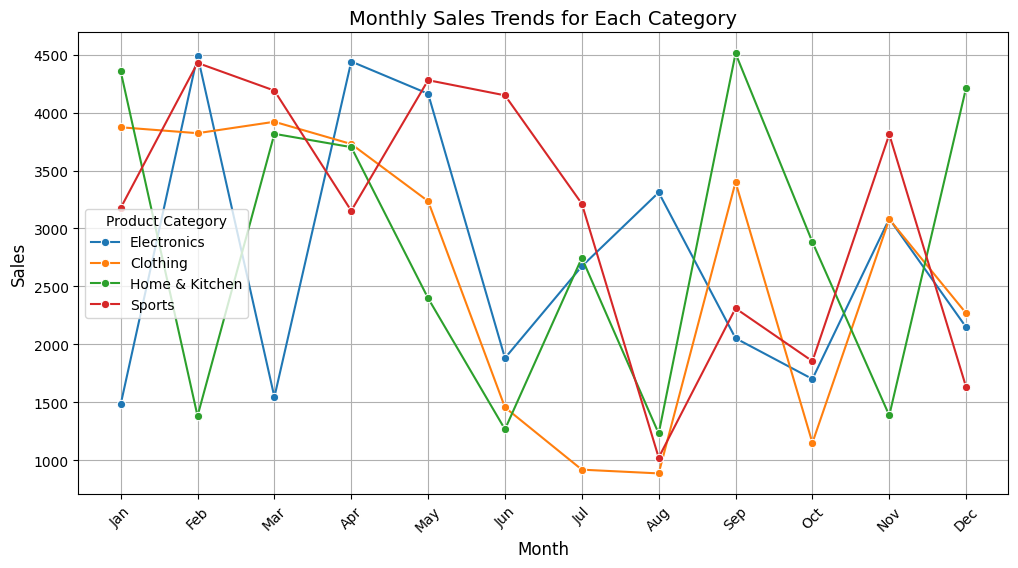

<ipython-input-16-0563209e4f54>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Sales", data=df_melted, palette="coolwarm")


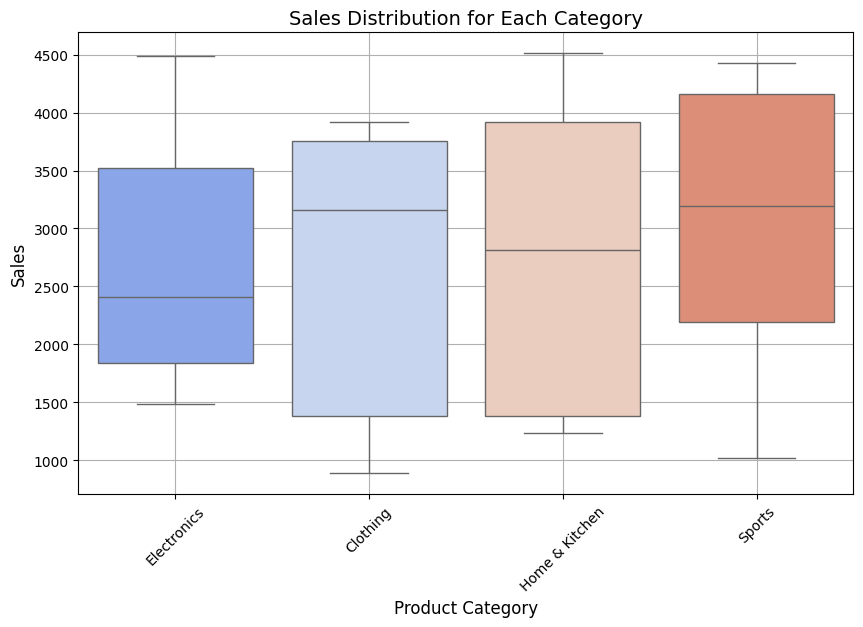

In [16]:
#PART 3
'''
Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category.
'''
plt.figure(figsize=(12, 6))
for category in ["Electronics", "Clothing", "Home & Kitchen", "Sports"]:
    sns.lineplot(x=df_sales.index, y=df_sales[category], marker="o", label=category)

plt.title("Monthly Sales Trends for Each Category", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend(title="Product Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
df_melted = df_sales.melt(id_vars=["Total Sales", "Growth Rate"], var_name="Category", value_name="Sales")
sns.boxplot(x="Category", y="Sales", data=df_melted, palette="coolwarm")
plt.title("Sales Distribution for Each Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [8]:
'''
Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row
'''
array = np.array([[1, -2, 3], [-4, 5, -6]])
abs_array = np.abs(array)
print("Element-wise Absolute Value:\n", abs_array)


Element-wise Absolute Value:
 [[1 2 3]
 [4 5 6]]


In [9]:
'''
Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
i. Find floor, ceiling and truncated value, rounded values
'''
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])
floor_values = np.floor(a)
ceiling_values = np.ceil(a)
truncated_values = np.trunc(a)

print("Floor Values: ", floor_values)
print("Ceiling Values: ", ceiling_values)
print("Truncated Values: ", truncated_values)
rounded_values = np.round(a, decimals=0)
print("Rounded Values: ", rounded_values)


Floor Values:  [-2. -2. -1.  0.  1.  1.  3.]
Ceiling Values:  [-1. -1. -0.  1.  2.  2.  3.]
Truncated Values:  [-1. -1. -0.  0.  1.  1.  3.]
Rounded Values:  [-2. -2. -0.  0.  2.  2.  3.]


In [10]:
'''
Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.
'''
def swap_elements(lst, pos1, pos2):
    temp = lst[pos1]
    lst[pos1] = lst[pos2]
    lst[pos2] = temp
my_list = [10, 20, 30, 40, 50]
pos1, pos2 = 1, 3
print("Original List:", my_list)
swap_elements(my_list, pos1, pos2)
print("List after swapping:", my_list)


Original List: [10, 20, 30, 40, 50]
List after swapping: [10, 40, 30, 20, 50]


In [11]:
'''
Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.
'''
def swap_set_elements(s, elem1, elem2):
    """Swaps two elements in a set by converting it to a list first."""
    if elem1 not in s or elem2 not in s:
        raise ValueError("One or both elements not found in the set!")
    lst = list(s)
    index1, index2 = lst.index(elem1), lst.index(elem2)
    lst[index1], lst[index2] = lst[index2], lst[index1]
    return set(lst)
my_set = {10, 20, 30, 40, 50}
print
swapped_set = swap_set_elements(my_set, 20, 40)
print("Set After Swapping:", swapped_set)


Original Set: {50, 20, 40, 10, 30}
Set After Swapping: {40, 10, 50, 20, 30}
